# Aluminum model with PHREEQC

Just make sure that this is working ok.

In [41]:
% setup environment
% clear data and number format
clear; format short e
% set path to equilibrium solver
txt=pwd; n=length(txt); rootpath=txt;
n=strfind(rootpath,"USERS"); rootpath=txt(1:n-2);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")

In [42]:
% define equilibrium problem

AlT=10e-5/0.997;  pH=2:0.1:12; pe=20.75-pH; T=25; show=0;

In [43]:
% MODEL USING PHREEQC

minerals=[{'Gibbsite'}]; totalvector=[AlT; 3*AlT]; totalnames=[{'Al'}; {'Cl'}]; 
speciesexport=[{'Al+3'}; {'OH-'};{'AlOH+2'};{'Al(OH)2+'};{'Al2(OH)2+4'};{'Al3(OH)4+5'};{'Al13O4(OH)24+7'};{'Al(OH)4-'}];
acid=['HCl']; 
database=['Al_species_ideal.dat']; 
%database=['Al_species.dat']; 
pHfixedcheck=1; % fixed pH

MASSERR = zeros(1, length(pH));
A = [1 0 1 1 2 3 13 1];

%% -----------------------------------------------------------
%% Outputs: vector
%% -----------------------------------------------------------
nPts         = length(pH);
Al           = zeros(1,nPts);  OH        = zeros(1,nPts);
AlOH         = zeros(1,nPts);  AlOH2     = zeros(1,nPts);
Al2OH2       = zeros(1,nPts);  Al3OH4    = zeros(1,nPts);
Al13         = zeros(1,nPts);  AlOH4     = zeros(1,nPts);
AlOH3s       = zeros(1,nPts);  Al_dissolved = zeros(1,nPts);
MASSERR      = zeros(1,nPts);

for i=1:length(pH)

[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=...
runPHREEQCv3(T,pH(i),pe(i),totalnames,totalvector,minerals,speciesexport,database,show,acid,pHfixedcheck);


Al(i)=solutionspeciesconcs(1); 
OH(i)=solutionspeciesconcs(2); 
AlOH(i)=solutionspeciesconcs(3); 
AlOH2(i)=solutionspeciesconcs(4); 
Al2OH2(i)=solutionspeciesconcs(5); 
Al3OH4(i)=solutionspeciesconcs(6);
Al13(i)=solutionspeciesconcs(7);
AlOH4(i)=solutionspeciesconcs(8);
AlOH3s(i)=solidconcs(1);

Al_dissolved(i) = A * solutionspeciesconcs; 
MASSERR(i)   = (Al_dissolved(i) + + AlOH3s(i)) - AlT;



end


# Al13 spots show up as blanks.  When Al13 causes PHREEQC to crash

because Al13 is polynuclear if the Al conc is low enough the calculations will work, and if the Al13 goes too high the calcs will fail.

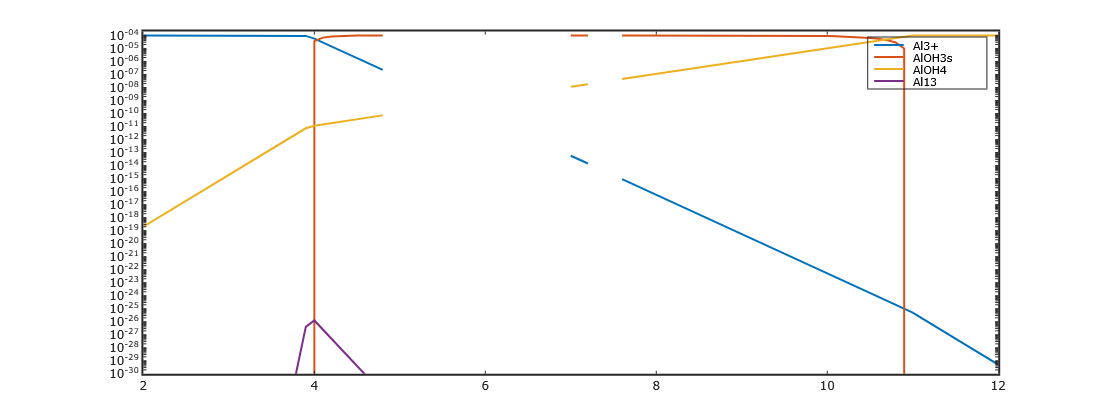

In [44]:
semilogy(pH,Al,'linewidth',2,pH,AlOH3s,'linewidth',2,pH,AlOH4,'linewidth',2, ...
pH,Al13,'linewidth',2)
 set(gca,'linewidth',2,'fontsize',12)
legend('Al3+','AlOH3s','AlOH4','Al13')
axis([2 12 1e-30 2e-4])

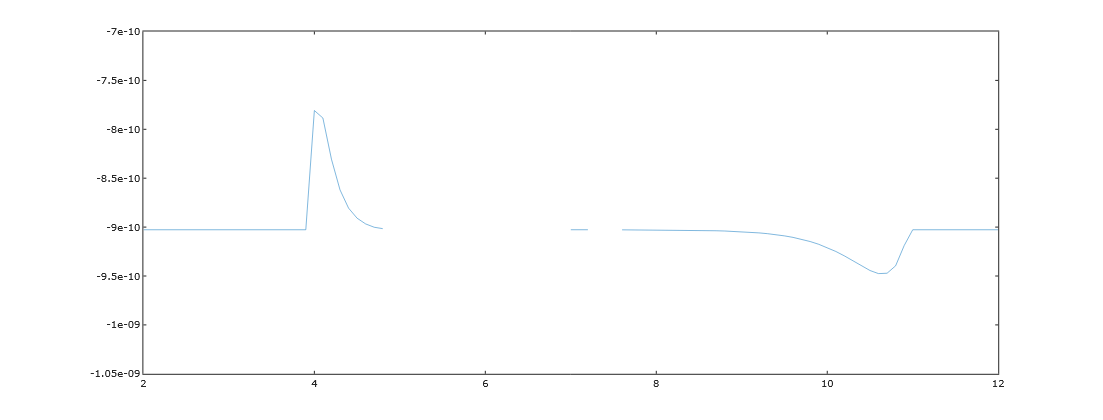

In [45]:
plot(pH,MASSERR)

In [46]:
%% -----------------------------------------------------------
%% Build the structure and save
%% -----------------------------------------------------------
Al_PHREEQC_Results = struct ( ...
  "pH",           pH, ...
  "pe",           pe, ...
  "AlT",          AlT*0.997, ...
  "PAlp3",        Al*0.997, ...
  "OH",           OH*0.997, ...
  "AlOH",         AlOH*0.997, ...
  "AlOH2",        AlOH2*0.997, ...
  "PAl2",         Al2OH2*0.997, ...
  "PAl3",         Al3OH4*0.997, ...
  "PAl13LOHR32p7",Al13*0.997, ...
  "PAlLOHR4m",    AlOH4*0.997, ...
  "PAlLOH3Rs",    AlOH3s*0.997, ...
  "Al_dissolved", Al_dissolved*0.997, ...
  "PMASSERR",     MASSERR*0.997 ...
);

save -v7 "Al_PHREEQC_Results.mat" "Al_PHREEQC_Results"